# CICIDS

### **PCA.ipynb**

The CICIDS2017 dataset is a comprehensive dataset for network intrusion detection, created by the Canadian Institute for Cybersecurity. It includes a diverse set of attack scenarios and normal traffic, making it suitable for training and evaluating intrusion detection systems.

The dataset includes various types of attacks such as Brute Force, Heartbleed, Botnet, DoS (Denial of Service), DDoS (Distributed Denial of Service), Web attacks, and Infiltration of the network from inside.

In this notebook we attempt to replicate the usage of PCA explained in the paper ["Towards Model Generalization for Intrusion Detection: Unsupervised Machine Learning Techniques"](https://biblio.ugent.be/publication/8725248)

In [1]:
model_name = "PCA"

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Step 1. Read data and import necessary libraries

In [3]:
import pandas as pd
df_train = pd.read_csv("./data/concatenated/concat.csv")

In [4]:
df_train.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
# df_train.shape

In [6]:
# df_train.info()

In [7]:
# df_train.describe()

In [8]:
# Remove leading and trailing whitespaces from column names
df_train.columns = df_train.columns.str.strip()

In [9]:
df_train.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

## Step 2. Data Cleaning

### A. Missing values

In [10]:
print(df_train.isna().sum().sum())

1358


In [11]:
df_train.dropna(subset=["Flow Bytes/s"], inplace=True)

In [12]:
print(df_train.isna().sum().sum())

0


### Inf. values

In [13]:
import numpy as np
df_train = df_train.replace([np.inf, -np.inf], np.nan).dropna()

## Step 3. Data Preparation

### A. Map labels

In [14]:
df_train["Label"].value_counts()

Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [15]:
# BINARY MAPPING - (Benign/Attack)
attack_mapping = {
	"BENIGN": 0,
	"DoS Hulk": 1,
	"PortScan": 1,
	"DDoS": 1,
	"DoS GoldenEye": 1,
	"FTP-Patator": 1,
	"SSH-Patator": 1,
	"DoS slowloris": 1,
	"DoS Slowhttptest": 1,
	"Bot": 1,
	"Web Attack � Brute Force": 1,
	"Web Attack � XSS": 1,
	"Infiltration": 1,
	"Web Attack � Sql Injection": 1,
	"Heartbleed": 1,
}

df_train["Label"] = df_train["Label"].map(attack_mapping)

In [16]:
df_train["Label"].value_counts()

Label
0    2271320
1     556556
Name: count, dtype: int64

### B. Data Splitting

In [17]:
X = df_train.drop(columns="Label")
y = df_train["Label"]

### C. Data Scaling

In [18]:
# Standardize the data (PCA assumes zero-mean, unit variance)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4. Model

#### A. Defining the model

In [19]:
from sklearn.decomposition import PCA

# Train PCA on **only benign data**
X_benign = X_scaled[y == 0]

### B. Training the model

In [20]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report

In [21]:
best_n = None
best_auc = 0
best_f1 = 0
best_predictions = None

In [22]:
# Define range of principal components to test
n_components_list = np.arange(9, 41, 1)

# DataFrame to store results
results_df = pd.DataFrame(columns=["n_components", "AUC", "F1"])

# Loop over each number of principal components, and fit a model
for idx, n_components in enumerate(n_components_list, 1):
	# Fit PCA on benign traffic
	pca = PCA(n_components=n_components)
	pca.fit(X_benign)

	# Transform and then inverse transform the entire dataset
	X_pca = pca.transform(X_scaled)
	X_reconstructed = pca.inverse_transform(X_pca)

	# Compute Reconstruction Error (Sum of Squared Errors - SSE)
	reconstruction_error = np.sum((X_scaled - X_reconstructed) ** 2, axis=1)

	# Determine anomaly threshold (e.g., 95th percentile of benign errors)
	threshold = np.percentile(reconstruction_error[y == 0], 95)

	# Predict anomalies
	y_pred = (reconstruction_error > threshold).astype(int)

	# Evaluate performance
	auc_score = roc_auc_score(y, reconstruction_error)
	f1 = f1_score(y, y_pred)

	# Store results in DataFrame
	results_df.loc[idx] = [n_components, auc_score, f1]

	# Print progress
	print(f"n_components={n_components}\t\tAUC={auc_score:.4f} F1={f1:.4f}")

	# Update best parameters
	if auc_score > best_auc:
		best_n = n_components
		best_auc = auc_score
		best_f1 = f1
		best_predictions = y_pred

print(f"\nBest n_components={best_n} AUC={best_auc:.4f} F1={best_f1:.4f}")

n_components=9		AUC=0.7652 F1=0.5467
n_components=10		AUC=0.7983 F1=0.5584
n_components=11		AUC=0.7999 F1=0.5596
n_components=12		AUC=0.8023 F1=0.5620
n_components=13		AUC=0.8024 F1=0.5621
n_components=14		AUC=0.8083 F1=0.5609
n_components=15		AUC=0.8168 F1=0.5584
n_components=16		AUC=0.8199 F1=0.5636
n_components=17		AUC=0.8274 F1=0.5705
n_components=18		AUC=0.8450 F1=0.5581
n_components=19		AUC=0.8472 F1=0.5639
n_components=20		AUC=0.8531 F1=0.5691
n_components=21		AUC=0.8456 F1=0.5252
n_components=22		AUC=0.8522 F1=0.5459
n_components=23		AUC=0.8601 F1=0.5623
n_components=24		AUC=0.8703 F1=0.5408
n_components=25		AUC=0.8726 F1=0.5630
n_components=26		AUC=0.8969 F1=0.5665
n_components=27		AUC=0.8870 F1=0.5607
n_components=28		AUC=0.8362 F1=0.5356
n_components=29		AUC=0.8487 F1=0.5468
n_components=30		AUC=0.8476 F1=0.5469
n_components=31		AUC=0.8476 F1=0.5469
n_components=32		AUC=0.8490 F1=0.5525
n_components=33		AUC=0.8388 F1=0.5524
n_components=34		AUC=0.8299 F1=0.5516
n_components=

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

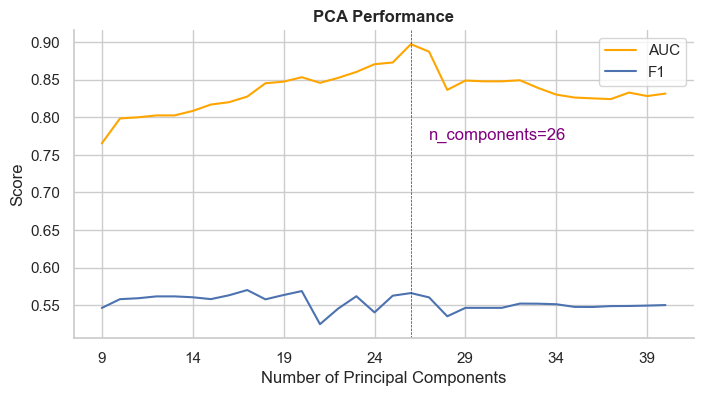

In [31]:
results_df["sum_of_f1_and_auc"] = results_df["F1"] + results_df["AUC"]

# Plot AUC and F1 scores
plt.figure(figsize=(8, 4))
sns.lineplot(x="n_components", y="AUC", data=results_df, label="AUC", color="orange")
sns.lineplot(x="n_components", y="F1", data=results_df, label="F1")
# sns.lineplot(x="n_components", y="sum_of_f1_and_auc", data=results_df, label="sum", color="purple")
plt.title("PCA Performance", fontweight="bold")

# Place a vertical line at the best n_components
plt.axvline(x=best_n, color="purple", linestyle="--", linewidth=0.5)
plt.text(best_n + 1, 0.77, f"n_components={best_n}", color="purple")

plt.xlabel("Number of Principal Components")
plt.ylabel("Score")
plt.xticks(np.arange(n_components_list[0], n_components_list[-1] + 1, 5))
plt.legend()
sns.despine()
plt.show()

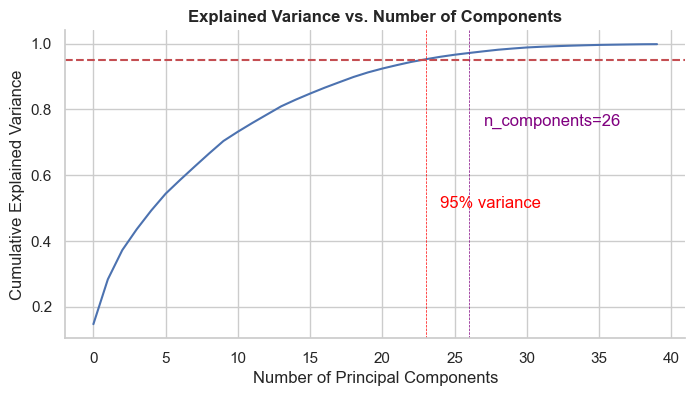

In [25]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle="-")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components", fontweight="bold")
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance line

# Place a vertical line at the best n_components
plt.axvline(x=best_n, color="purple", linestyle="--", linewidth=0.5)
plt.text(best_n + 1, 0.75, f"n_components={best_n}", color="purple")

# Place a vertical line where 95% variance is achieved
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95), color="red", linestyle="--", linewidth=0.5)
plt.text(np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1, 0.5, "95% variance", color="red")

sns.despine()
plt.show()

### C. Run PCA with best parameters, and show classification report

In [32]:
pca = PCA(n_components=best_n)
pca.fit(X_benign)
X_pca = pca.transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.sum((X_scaled - X_reconstructed) ** 2, axis=1)
threshold = np.percentile(reconstruction_error[y == 0], 95)
y_pred = (reconstruction_error > threshold).astype(int)
print(f"Classification report:\n{classification_report(y, y_pred)}")

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91   2271320
           1       0.70      0.48      0.57    556556

    accuracy                           0.86   2827876
   macro avg       0.79      0.71      0.74   2827876
weighted avg       0.85      0.86      0.85   2827876

